# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
mobile = pd.read_csv('Mobile phone price.csv')

In [3]:
mobile.shape

(407, 8)

In [4]:
mobile.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [5]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [6]:
mobile.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


In [7]:
mobile.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [8]:
mobile['price'] = mobile['Price ($)'].replace('\W', '', regex=True)

In [9]:

mobile ['price'] = mobile['price'].astype(int)
mobile = mobile.drop(columns= ['Price ($)'])
mobile['Battery Capacity (mAh)'] = mobile['Battery Capacity (mAh)'].astype(int)


In [10]:
mobile["Storage"]=mobile["Storage "].str.strip('GB')
mobile = mobile.drop(columns= ["Storage "])
mobile ['Storage'] = mobile['Storage'].astype(int)

In [11]:
mobile["RAM"]=mobile["RAM "].str.strip('GB')
mobile = mobile.drop(columns= ["RAM "])
mobile ['RAM'] = mobile['RAM'].astype(int)

In [12]:
#I'll split the mp coluumn, and create a new column with a sum of it
total_mp = mobile['Camera (MP)'].str.split('+', 4, expand=True)
total_mp = total_mp.replace('MP', '', regex=True)
total_mp = total_mp.replace('D', '', regex=True)
total_mp = total_mp.replace('ToF', '', regex=True)
total_mp = total_mp.replace(' ', '', regex=True)
total_mp = total_mp.replace('', 0, regex=True)
total_mp = total_mp.astype(float)
total_mp = total_mp.fillna(0)
total_mp['total'] =( total_mp[0] + total_mp[1]) + (total_mp[2] + total_mp[3])
mobile['total_mp'] = total_mp['total']
mobile = mobile.drop(columns= ["Camera (MP)"])

In [13]:
mobile["Screen Size (inches)"].unique()

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.55', '6.78', '6.43', '6.5',
       '6.62', '5.4', '6.2', '6.51', '6.6', '4.7', '6.58', '6.52', '6.44',
       '6.53', '6.56', '6.8 + 3.9', '4.5', '6.39', '5.9', '5.5', '6.81',
       '5.99', '6.82', '6.3', '6.22', '6', '6.35', '6.9', '6.76', '6.49',
       '6.72', '5.7', '6.47', '7.6 (unfolded)', '6.15', '6.57'],
      dtype=object)

In [14]:
#cleaning and transforming screen size column
mobile['Screen Size (inches)']= mobile['Screen Size (inches)'].replace('(unfolded)', '', regex=True)
mobile['Screen Size (inches)']= mobile['Screen Size (inches)'].replace('6.8+3.9', '10.7', regex=True)
mobile['Screen Size (inches)'] = mobile['Screen Size (inches)'].str.strip('()')
screen_size = mobile['Screen Size (inches)'].str.split('+', 1, expand=True)
screen_size[1] = screen_size[1].replace(' ', '')
screen_size = screen_size.fillna(0)
screen_size = screen_size.astype(float)
screen_size_final = screen_size[0] + screen_size[1]
mobile['screen_size'] = screen_size_final
mobile = mobile.drop(columns=['Screen Size (inches)'])

In [15]:
mobile.duplicated().sum()
mobile=mobile.drop_duplicates()

# checking for outliers and removeing them on price column

C:\Users\ankup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='price'>

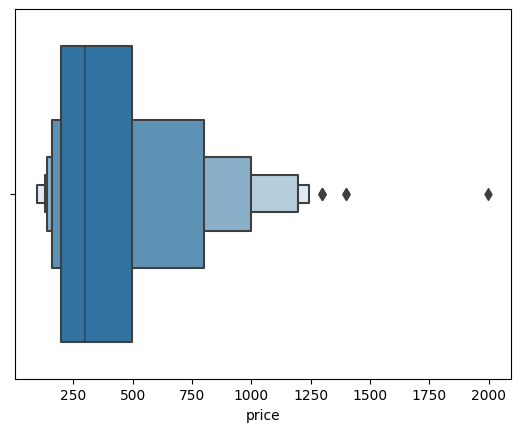

In [16]:
sns.boxenplot(mobile["price"])

In [17]:
mobile=mobile[mobile["price"]<1250]

Text(0.5, 1.0, 'Histogram of Price and number of Phones')

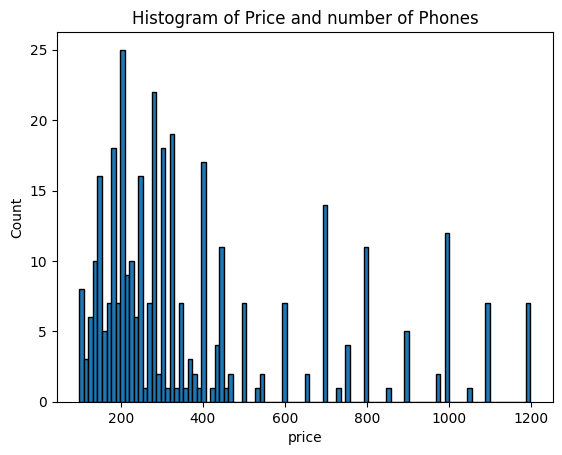

In [18]:
plt.hist(mobile['price'], bins=100, edgecolor='black')
plt.xlabel('price')
plt.ylabel('Count')
plt.title('Histogram of Price and number of Phones')

# Some initial questions:

What is the most expensive cell phone?

What is the most frequent brand?

On average, which is the most expensive and cheapest brand?

What are the features that have some correlation with the price?



# What is the most expensive cell phone?

In [19]:
mobile.sort_values(by='price',ascending=False).head(10)

,Brand,Model,Battery Capacity (mAh),price,Storage,RAM,total_mp,screen_size
292,Huawei,Mate 40 Pro,4400,1199,256,8,85.0,6.76
104,Xiaomi,Mi 11 Ultra,5000,1199,256,12,146.0,6.81
148,Samsung,Galaxy S21 Ultra 5G,5000,1199,256,12,140.0,6.80
392,Samsung,Galaxy S20 Ultra 5G,5000,1199,128,12,168.3,6.90
14,Oppo,Find X3 Pro,4500,1199,256,12,116.0,6.70
9,Vivo,X70 Pro+,4500,1199,256,12,118.0,6.78
1,Samsung,Galaxy S21 Ultra,5000,1199,256,12,140.0,6.80
297,Apple,iPhone 11 Pro Max,3969,1099,512,4,36.0,6.50
338,Apple,iPhone XS Max,3174,1099,256,4,24.0,6.50
330,Huawei,Mate 30 Pro 5G,4500,1099,256,8,91.0,6.53


We can see the 10 most expensive cell phones and the most expensive cell phone is galaxy z fold2 5g from Samsung costing $1999







In [20]:
most_frequent = mobile.groupby('Brand').size().sort_values(ascending=False)


Text(0, 0.5, 'Number of Phones')

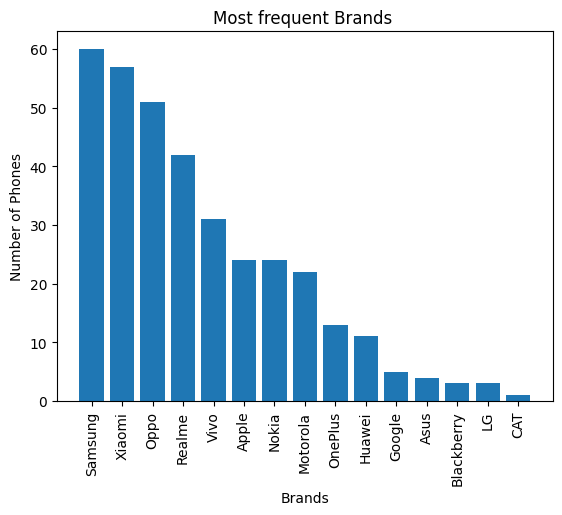

In [21]:
plt.bar(most_frequent.keys(),most_frequent.values)
plt.tick_params(axis='x', rotation=90)
plt.title("Most frequent Brands ")
plt.xlabel("Brands")
plt.ylabel("Number of Phones")


1.Samsung is the most frequent brand.

2.The second most frequent brand is Xiaomi.

3.Third is Oppo.


<AxesSubplot: xlabel='price', ylabel='Brand'>

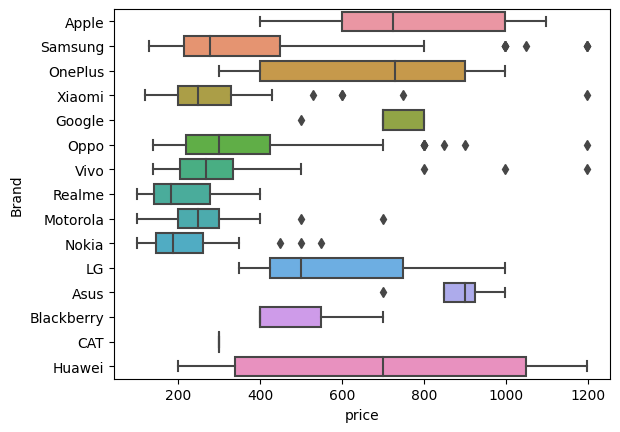

In [22]:
sns.boxplot(data=mobile,x='price',y='Brand')

In [23]:
expensive_brand=mobile.groupby(by="Brand")["price"].mean().sort_values(ascending=False).keys()[0]
cheapest_brand=mobile.groupby(by="Brand")["price"].mean().sort_values(ascending=False).keys()[-1]

print("On average the most expensive brand is",expensive_brand)
print("On average the most cheapest brand brand is",cheapest_brand)

On average the most expensive brand is Asus
On average the most cheapest brand brand is Realme


Text(0.5, 1.0, 'Correlation Heatmap')

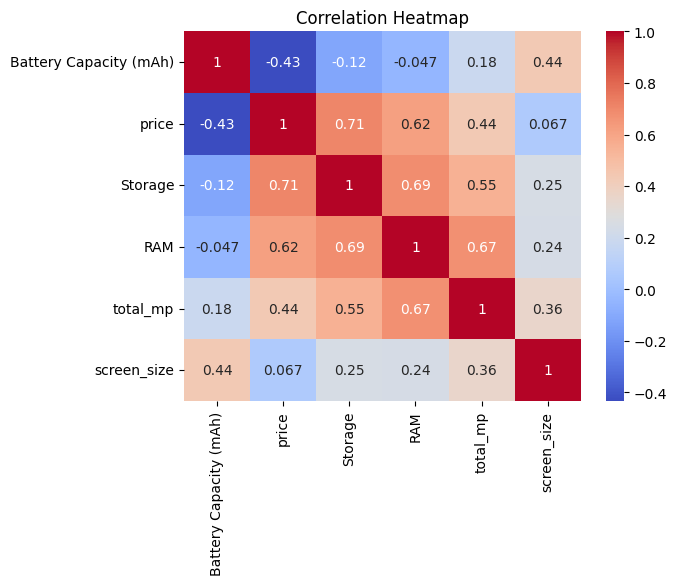

In [24]:
corr=mobile.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Correlation of features with price:

storage: 0.71

screen_size: 0.067

ram: 0.62

total_mp: 0.044

battery: -0.43

# EDA Conclusion

Samsung is the most expensive brand, with the most expensive cell phone among the top 10 brands.

Samsung is also the most frequent brand in the dataset.

The most expensive brand on average is Asus, with an average price of $ 874 .

Realme is the cheapest brand with an average price of $208.

Most features in the dataset show some linear correlation with price, indicating potential influence on the pricing. However, some features are also correlated with each other.

In conclusion, the analysis indicates that Samsung is the most expensive and frequent brand, and there are potential correlations between features and price. However, further investigation is needed to account for multicollinearity and consider other frequent brands for a comprehensive analysis